<a href="https://colab.research.google.com/github/bhavikaradadiya/Term-Life-Insurance-Prediction/blob/main/Q1080109FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("/content/dataset.csv")
# Re-define the data_summary_report function and run the analysis again
def data_summary_report(data):
    # Numerical features
    numerical_columns = ['age', 'day', 'dur', 'num_calls']

    # Central tendency and dispersion for numerical features
    numerical_stats = pd.DataFrame({
        'Mean': data[numerical_columns].mean(),
        'Median': data[numerical_columns].median(),
        'Standard Deviation': data[numerical_columns].std()
    })
# Frequency analysis for categorical features
    categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']
    categorical_frequencies = data[categorical_columns].apply(lambda x: x.value_counts())

    return numerical_stats, categorical_frequencies

# Generate the report
numerical_stats, categorical_frequencies = data_summary_report(data)
numerical_stats, categorical_frequencies.head()  # Show top frequency counts for categorical features




(                 Mean  Median  Standard Deviation
 age         40.936188    39.0           10.618757
 day         15.806419    16.0            8.322476
 dur        258.163080   180.0          257.527812
 num_calls    2.763841     2.0            3.098021,
                 job  marital  education_qual  call_type     mon  prev_outcome  \
 admin.       5171.0      NaN             NaN        NaN     NaN           NaN   
 apr             NaN      NaN             NaN        NaN  2932.0           NaN   
 aug             NaN      NaN             NaN        NaN  6247.0           NaN   
 blue-collar  9732.0      NaN             NaN        NaN     NaN           NaN   
 cellular        NaN      NaN             NaN    29285.0     NaN           NaN   
 
               y  
 admin.      NaN  
 apr         NaN  
 aug         NaN  
 blue-collar NaN  
 cellular    NaN  )

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/dataset.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("missing values =")
print(missing_values)
# Calculate percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Display missing values and their percentages
print(missing_percentage[missing_percentage > 0])

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for numerical columns
numerical_columns = ['age', 'day', 'dur', 'num_calls']
outliers = {col: detect_outliers_iqr(data, col) for col in numerical_columns}

# Display outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}: {len(outlier_data)} rows")



missing values =
age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64
Series([], dtype: float64)
Outliers in age: 487 rows
Outliers in day: 0 rows
Outliers in dur: 3235 rows
Outliers in num_calls: 3064 rows


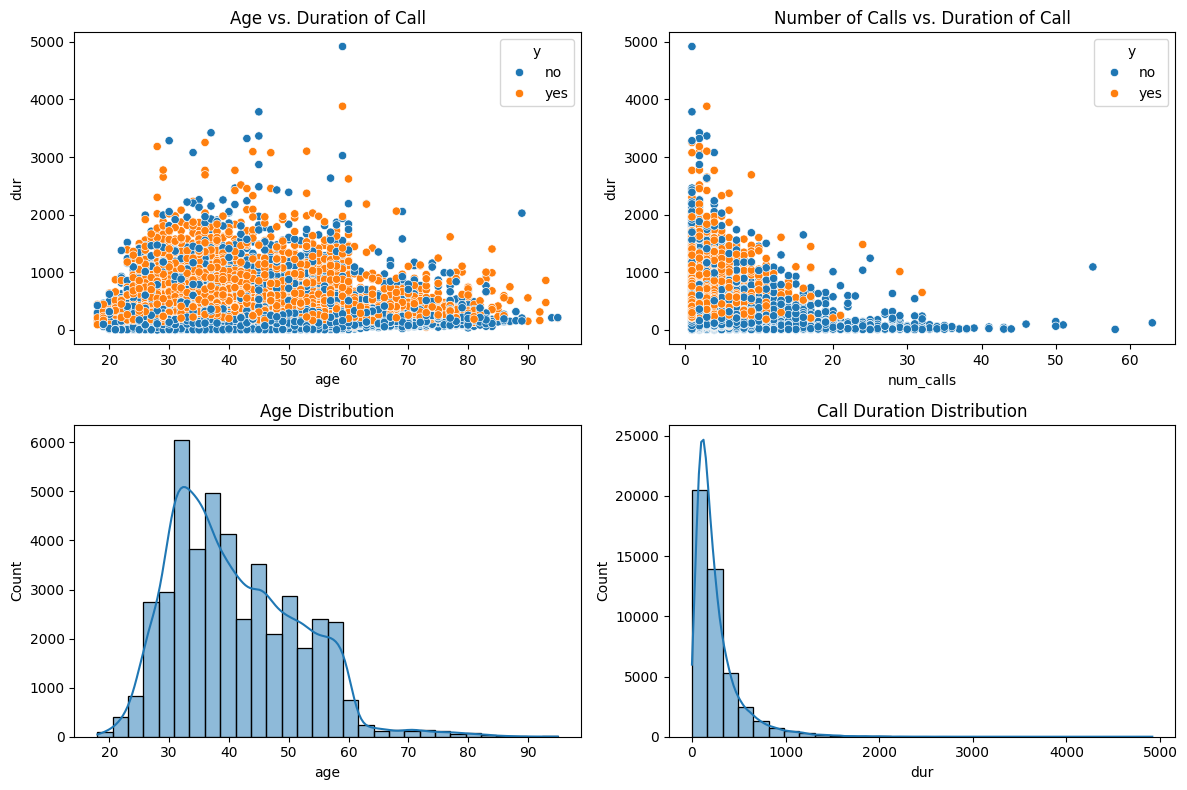

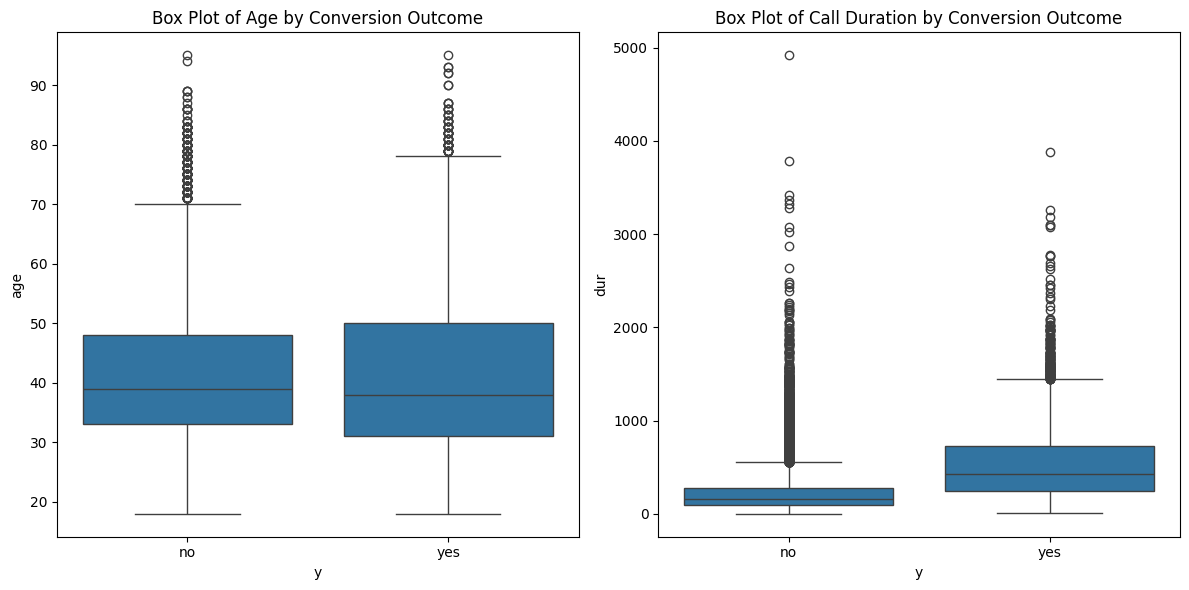

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/dataset.csv")

# Scatter plots to visualize numerical features against the target variable 'y'
plt.figure(figsize=(12, 8))

# Scatter plot: age vs. duration
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='dur', hue='y', data=data)
plt.title('Age vs. Duration of Call')

# Scatter plot: num_calls vs. duration
plt.subplot(2, 2, 2)
sns.scatterplot(x='num_calls', y='dur', hue='y', data=data)
plt.title('Number of Calls vs. Duration of Call')

# Histograms to visualize the distribution of numerical features
plt.subplot(2, 2, 3)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['dur'], bins=30, kde=True)
plt.title('Call Duration Distribution')

plt.tight_layout()
plt.show()

# Box plots to identify outliers and compare distributions
plt.figure(figsize=(12, 6))

# Box plot for age
plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='age', data=data)
plt.title('Box Plot of Age by Conversion Outcome')

# Box plot for call duration
plt.subplot(1, 2, 2)
sns.boxplot(x='y', y='dur', data=data)
plt.title('Box Plot of Call Duration by Conversion Outcome')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
data = pd.read_csv("/content/dataset.csv")

#Preprocessing: Encode categorical variables
label_encoders = {}
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']
for col in categorical_columns:
   le = LabelEncoder()
   data[col] = le.fit_transform(data[col])
   label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased max_iter and scaled data
log_reg = LogisticRegression(max_iter=500)  # Increased max_iter to 500
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest does not require scaling, but we'll still use the original data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
# Evaluate both models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.8886021822471247
Random Forest Accuracy: 0.903273370687113


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/dataset.csv")

# Preprocessing: Encode categorical variables
label_encoders = {}
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets (Stratified Split)
# Stratify ensures the proportion of the target variable is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Check the distribution of the target variable in the original data, training set, and testing set
print("Original data distribution:\n", y.value_counts(normalize=True))
print("\nTraining set distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set distribution:\n", y_test.value_counts(normalize=True))


Original data distribution:
 y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

Training set distribution:
 y
0    0.883022
1    0.116978
Name: proportion, dtype: float64

Test set distribution:
 y
0    0.882999
1    0.117001
Name: proportion, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Preprocessing: scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Get feature names and their coefficients
coefficients = log_reg.coef_[0]
feature_names = X.columns
feature_importance_log_reg = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display the most important features
print("Logistic Regression Feature Importance:\n", feature_importance_log_reg)


Logistic Regression Feature Importance:
           Feature  Coefficient
7             dur     0.982040
2         marital     0.198546
0             age     0.197650
3  education_qual     0.195075
1             job     0.084226
6             mon     0.052353
5             day    -0.039365
9    prev_outcome    -0.116242
8       num_calls    -0.384887
4       call_type    -0.650140


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Random Forest Feature Importance:\n", feature_importance_rf)


Random Forest Feature Importance:
           Feature  Importance
7             dur    0.340443
0             age    0.143336
5             day    0.127858
6             mon    0.114275
9    prev_outcome    0.071718
1             job    0.063734
8       num_calls    0.051172
3  education_qual    0.034420
2         marital    0.027520
4       call_type    0.025522


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
data = pd.read_csv("/content/dataset.csv")
# 'target_column' is the column that we are predicting (term life insurance conversion)
X = data.drop(columns=['y'])  # Replace with actual target column
y = data['y']
# Split the data into training and test sets (stratify on the target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#  Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Select categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Select numerical columns

#  Define the ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)

#  Fit the preprocessor and transform the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_processed, y_train)

#Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_processed, y_train)

# Make predictions for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_processed)

# Make predictions for Random Forest
y_pred_rf = random_forest.predict(X_test_processed)

#Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, pos_label='yes')
recall_log_reg = recall_score(y_test, y_pred_log_reg, pos_label='yes')
f1_log_reg = f1_score(y_test, y_pred_log_reg, pos_label='yes')

print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Specify pos_label='yes' for Random Forest as well
precision_rf = precision_score(y_test, y_pred_rf, pos_label='yes')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='yes')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='yes')

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Generate a detailed classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Evaluation:
Accuracy: 0.9003
Precision: 0.6429
Recall: 0.3318
F1-Score: 0.4377

Random Forest Evaluation:
Accuracy: 0.9025
Precision: 0.6321
Recall: 0.3979
F1-Score: 0.4884

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95      7985
         yes       0.64      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043


Random Forest Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.63      0.40      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
# Define the custom F1 score with pos_label='yes'
#  Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Select categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Select numerical columns

#  Define the ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)
#  Fit the preprocessor and transform the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}
# Perform GridSearchCV for Logistic Regression with custom F1 scorer
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train_processed, y_train)
# Best parameters for Logistic Regression
best_params_log_reg = grid_search_log_reg.best_params_
print("Best parameters for Logistic Regression:", best_params_log_reg)
# Train the Logistic Regression model with best parameters
log_reg_tuned = LogisticRegression(**best_params_log_reg)
log_reg_tuned.fit(X_train_processed, y_train)
# Predict using the tuned model
y_pred_log_reg_tuned = log_reg_tuned.predict(X_test_processed)
#evaluate the model performance using the F1 score
accuracy_log_reg_tuned = accuracy_score(y_test, y_pred_log_reg_tuned)
precision_log_reg_tuned = precision_score(y_test, y_pred_log_reg_tuned, pos_label='yes')
recall_log_reg_tuned = recall_score(y_test, y_pred_log_reg_tuned, pos_label='yes')
f1_log_reg_tuned = f1_score(y_test, y_pred_log_reg_tuned, pos_label='yes')
print("\nTuned Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_log_reg_tuned:.4f}")
print(f"Precision: {precision_log_reg_tuned:.4f}")
print(f"Recall: {recall_log_reg_tuned:.4f}")
print(f"F1-Score: {f1_log_reg_tuned:.4f}")
#classification report for tuned model
print("\nTuned Logistic regression Classification Report:\n", classification_report(y_test, y_pred_log_reg_tuned))

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}

Tuned Logistic Regression Evaluation:
Accuracy: 0.9004
Precision: 0.6435
Recall: 0.3327
F1-Score: 0.4386

Tuned Logistic regression Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95      7985
         yes       0.64      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
# Copying data for preprocessing
data = pd.read_csv("/content/dataset.csv")

# Label encoding the target variable 'y' (binary classification)
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
# Performing one-hot encoding on the categorical features
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], drop_first=True)

# Splitting data into features (X) and target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Select categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Select numerical columns

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)
#  Fit the preprocessor and transform the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# Defining the Random Forest model
rf = RandomForestClassifier(random_state=42)
# Defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]}
# Using GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fitting the model on the training data
grid_search.fit(X_train, y_train)
# Best parameters for Random Forest
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)
# Train the Random Forests model with best parameters
rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train_processed, y_train)
# Predict using the tuned model
y_pred_rf_tuned = rf_tuned.predict(X_test_processed)
#evaluate the model performance using the F1 score
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
print("\nTuned Random forest Evaluation:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1-Score: {f1_rf_tuned:.4f}")
#classification report for tuned model
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Tuned Random forest Evaluation:
Accuracy: 0.8848
Precision: 0.5485
Recall: 0.2539
F1-Score: 0.3471

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.55      0.25      0.35      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.61      0.64      9043
weighted avg       0.86      0.88      0.87      9043

